In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [36]:
ds=pd.read_csv('seattle-weather.csv')
ds

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,1
1,2/1/2012,10.9,10.6,2.8,4.5,2
2,3/1/2012,0.8,11.7,7.2,2.3,2
3,4/1/2012,20.3,12.2,5.6,4.7,2
4,5/1/2012,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,27-12-2015,8.6,4.4,1.7,2.9,2
1457,28-12-2015,1.5,5.0,1.7,1.3,2
1458,29-12-2015,0.0,7.2,0.6,2.6,5
1459,30-12-2015,0.0,5.6,-1.0,3.4,3


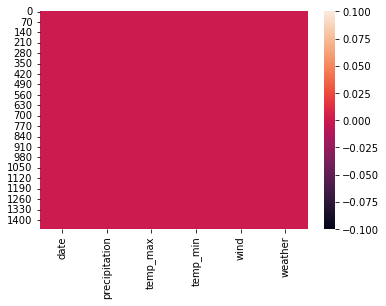

In [37]:
sns.heatmap(ds.isnull())
ds1=ds.dropna()

<AxesSubplot:>

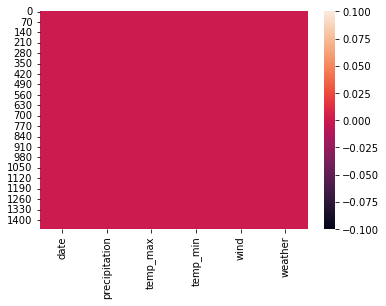

In [38]:
sns.heatmap(ds1.isnull())

In [39]:
#predict
#x=ds1[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']].values #iloc[:,:-1].values
#y=ds1['RainTomorrow'].values

#weather_data.csv
#x=ds1[['Summary','Precip Type','Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)']].values
#y=ds1['Daily Summary'].values


#seattle-weather.csv
x=ds1[['precipitation','temp_max','temp_min','wind']].values 
y=ds1['weather'].values

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [41]:
print("no of rows,column",x.shape)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

no of rows,column (1461, 4)
x_train (1022, 4)
x_test (439, 4)
y_train (1022,)
y_test (439,)


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
clf = LogisticRegression()#random_state=0)

In [44]:
clf.fit(x_train,y_train)


E:\SOFTWARE\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
clf.score(x_test, y_test)*100

85.42141230068337

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
from sklearn.model_selection import KFold

In [48]:
kf = KFold(n_splits=10)
kf.get_n_splits(x)

10

In [49]:
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [50]:
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 147  148  149 ... 1458 1459 1460] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146]
TRAIN: [   0    1    2 ... 1458 1459 1460] TEST: [147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221

In [51]:
score=cross_val_score(clf,x,y,cv=kf)

E:\SOFTWARE\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\SOFTWARE\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [52]:
print("Cross Validation scores are{}".format(score))

Cross Validation scores are[0.7755102  0.73287671 0.74657534 0.90410959 0.88356164 0.95205479
 0.89041096 0.80136986 0.9109589  0.81506849]


In [53]:
Avg=score.mean()
Avg

0.8412496505451497